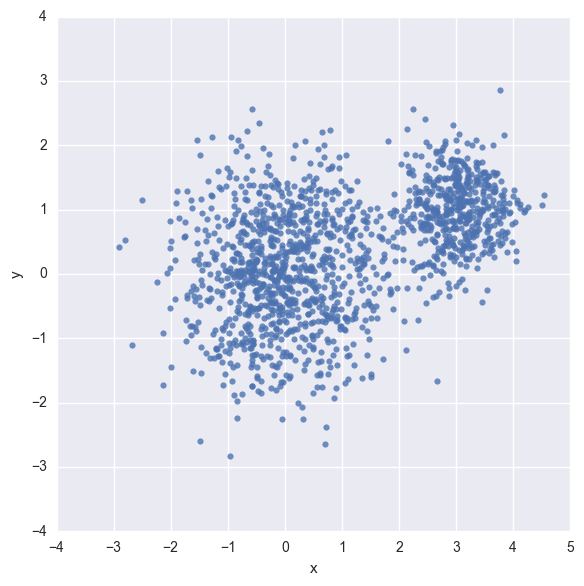

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sb
import tensorflow as tf


num_vectors = 1000
num_clusters = 3
num_steps = 100
vector_values = []
for i in xrange(1000):
    vector_values.append(
        [np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
for i in xrange(500):
    vector_values.append(
        [np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

df = pd.DataFrame({"x": [v[0] for v in vector_values],
                   "y": [v[1] for v in vector_values]})
# print df
sb.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.pyplot.show()

(1, 1500, 2)
(3, 1, 2)
Instructions for updating:
Use `tf.global_variables_initializer` instead.
centroids
[[ 2.94657803  0.9450078 ]
 [-0.10118449 -0.75471306]
 [-0.08363023  0.70725858]]


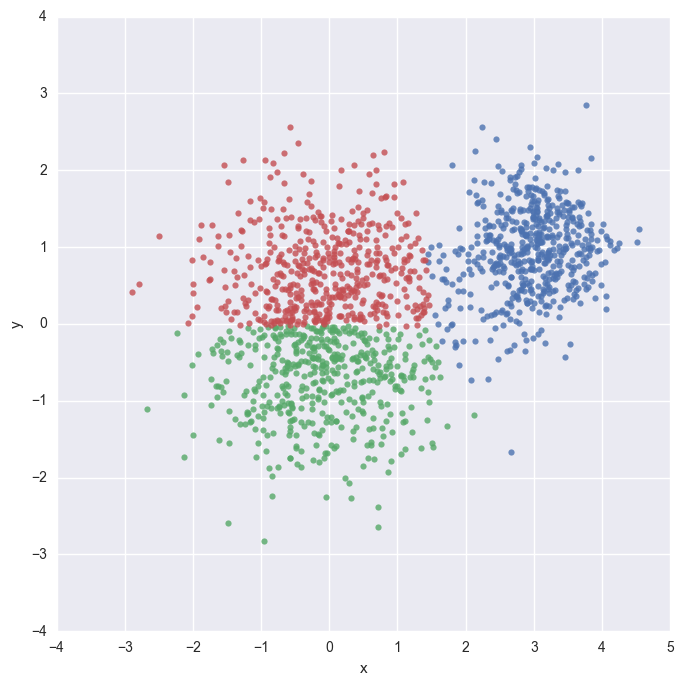

In [2]:

vectors = tf.constant(vector_values)
centroids = tf.Variable(
    tf.slice(tf.random_shuffle(vectors), [0, 0], [num_clusters, -1]))
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print(expanded_vectors.get_shape())
print(expanded_centroids.get_shape())

distances = tf.reduce_sum(
    tf.square(tf.sub(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)

means = tf.concat(0, [
    tf.reduce_mean(
        tf.gather(vectors,
                  tf.reshape(
                      tf.where(
                          tf.equal(assignments, c)
                      ), [1, -1])
                  ), reduction_indices=[1])
    for c in range(num_clusters)])

update_centroids = tf.assign(centroids, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

for step in range(num_steps):
    _, centroid_values, assignment_values = sess.run(
        [update_centroids, centroids, assignments])

print("centroids")
print(centroid_values)


data = {"x": [], "y": [], "cluster": []}
for i in range(len(assignment_values)):
    data["x"].append(vector_values[i][0])
    data["y"].append(vector_values[i][1])
    data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sb.lmplot("x", "y", data=df,
          fit_reg=False, size=7,
          hue="cluster", legend=False)
plt.pyplot.show()
